In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


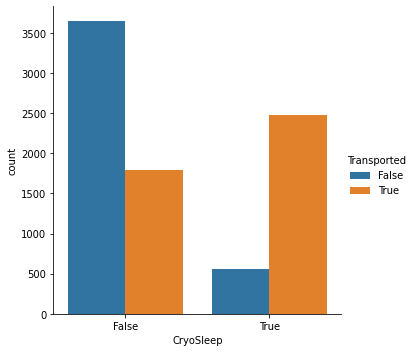

In [5]:
sns.catplot(data=train, x='CryoSleep', hue = 'Transported', kind = 'count')

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


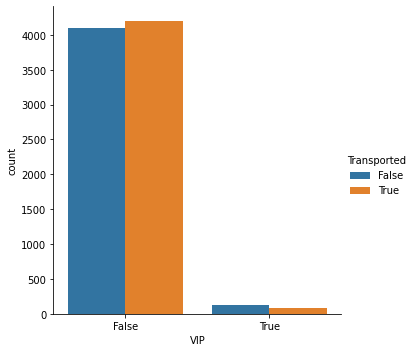

In [7]:
sns.catplot(data= train, x='VIP', hue='Transported', kind='count')

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

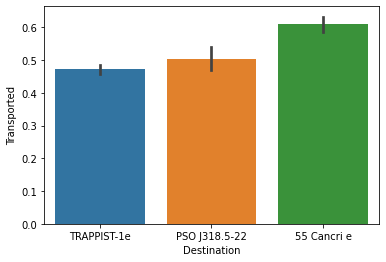

In [8]:
sns.barplot(data=train, x='Destination', y='Transported')
train.Destination.unique()


Text(0, 0.5, 'Number of passengers')

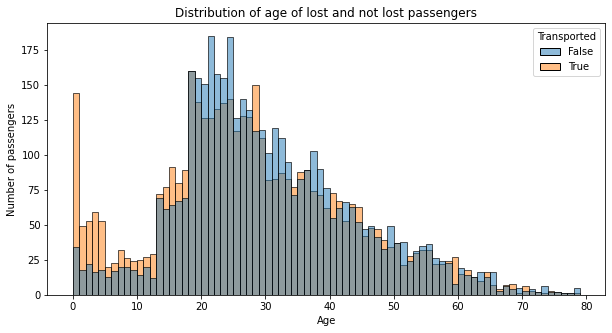

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
g = sns.histplot(data=train, x='Age', hue='Transported', bins=79, ax=ax)
g.set(title='Distribution of age of lost and not lost passengers')
g.set_ylabel('Number of passengers')

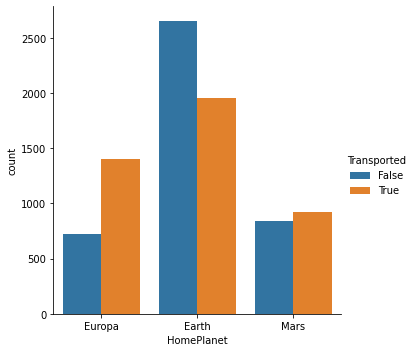

In [10]:

sns.catplot(data=train, x='HomePlanet', hue='Transported', kind='count')

In [11]:
train['Deck'] = train.Cabin.str[0]
train['Num'] = train.Cabin.str[2]
train['Side'] = train.Cabin.str[-1]
train.isna().sum()
#train['Cabin'].unique()
#train.head()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side            199
dtype: int64

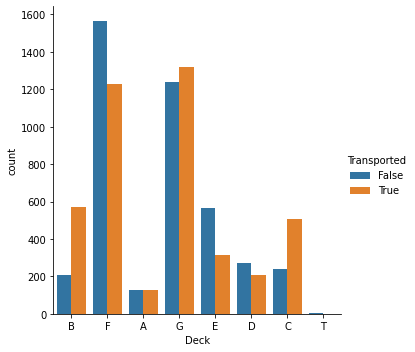

In [12]:
sns.catplot(data = train, x='Deck', hue='Transported', kind='count')

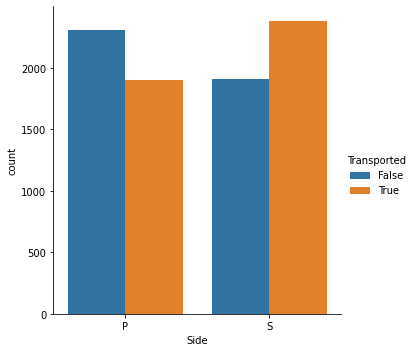

In [13]:
sns.catplot(data=train, x='Side', hue='Transported', kind='count')

In [14]:
DECK_dict={'A':1, 'T':1, 'D':1, 'E':1, 'B':2, 'C':2, 'G':3,'F':3}
SIDE_dict ={'P':1, 'S':0}
HOME_dict = {'Europa':3, 'Mars':2, 'Earth':1}
DEST_dict = {'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3}

In [15]:
train['Deck'] = train.Deck.replace(DECK_dict)
train['Side'] = train.Side.replace(SIDE_dict)
train['HomePlanet'] = train.Deck.replace(HOME_dict)
train['Destination'] = train.Side.replace(DEST_dict)
train['CryoSleep'] = train.CryoSleep.replace({'True':1, 'False':0})
train['VIP'] = train.VIP.replace({'True':1, 'False':0})
train['Transported'] = train.Transported.replace({'True':1, 'False':0})
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,2.0,False,B/0/P,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,0,1.0
1,0002_01,3.0,False,F/0/S,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,3.0,0,0.0
2,0003_01,1.0,False,A/0/S,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,0,0.0
3,0003_02,1.0,False,A/0/S,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,0,0.0
4,0004_01,3.0,False,F/1/S,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,3.0,1,0.0


In [16]:
print(f'Nan in Age:{train.Age.isna().sum()}')
print(f'Nan in Age:{train.RoomService.isna().sum()}')
print(f'Nan in Age:{train.FoodCourt.isna().sum()}')
print(f'Nan in Age:{train.ShoppingMall.isna().sum()}')
print(f'Nan in Age:{train.Spa.isna().sum()}')
print(f'Nan in Age:{train.VRDeck.isna().sum()}')
print(f'Nan in Age:{train.Deck.isna().sum()}')
print(f'Nan in Age:{train.Side.isna().sum()}')
print(f'Nan in Age:{train.HomePlanet.isna().sum()}')
print(f'Nan in Age:{train.Destination.isna().sum()}')

Nan in Age:179
Nan in Age:181
Nan in Age:183
Nan in Age:208
Nan in Age:183
Nan in Age:188
Nan in Age:199
Nan in Age:199
Nan in Age:199
Nan in Age:199


In [17]:
train.Age.fillna(train.Age.mean(), inplace=True)
train.RoomService.fillna(train.RoomService.mean(), inplace=True)
train.FoodCourt.fillna(train.FoodCourt.mean(), inplace=True)
train.ShoppingMall.fillna(train.ShoppingMall.mean(), inplace=True)
train.Spa.fillna(train.Spa.mean(), inplace=True)
train.VRDeck.fillna(train.VRDeck.mean(), inplace=True)
train.Deck.fillna(0, inplace=True)
train.Side.fillna(0, inplace=True)
train.HomePlanet.fillna(0, inplace=True)
train.Destination.fillna(0, inplace=True)
train.CryoSleep.fillna(-1, inplace=True)
train.VIP.fillna(-1, inplace=True)


In [18]:
print(f'Overall nan:{train.isna().sum()}')

Overall nan:PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num             199
Side              0
dtype: int64


In [19]:
test['Deck'] = test.Cabin.str[0]
test['Num'] = test.Cabin.str[2]
test['Side'] = test.Cabin.str[-1]
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [20]:
test['Deck'] = test.Deck.replace(DECK_dict)
test['Side'] = test.Side.replace(SIDE_dict)
test['HomePlanet'] = test.Deck.replace(HOME_dict)
test['Destination'] = test.Side.replace(DEST_dict)
test['CryoSleep'] = test.CryoSleep.replace({'True':1, 'False':0})
test['VIP'] = test.VIP.replace({'True':1, 'False':0})
test.Age.fillna(test.Age.mean(), inplace=True)
test.RoomService.fillna(test.RoomService.mean(), inplace=True)
test.FoodCourt.fillna(test.FoodCourt.mean(), inplace=True)
test.ShoppingMall.fillna(test.ShoppingMall.mean(), inplace=True)
test.Spa.fillna(test.Spa.mean(), inplace=True)
test.VRDeck.fillna(test.VRDeck.mean(), inplace=True)
test.Deck.fillna(0, inplace=True)
test.Side.fillna(0, inplace=True)
test.HomePlanet.fillna(0, inplace=True)
test.Destination.fillna(0, inplace=True)
test.CryoSleep.fillna(-1, inplace=True)
test.VIP.fillna(-1, inplace=True)

test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,3.0,True,G/3/S,0.0,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,3.0,3,0.0
1,0018_01,3.0,False,F/4/S,0.0,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,3.0,4,0.0
2,0019_01,2.0,True,C/0/S,0.0,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2.0,0,0.0
3,0021_01,2.0,False,C/1/S,0.0,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2.0,1,0.0
4,0023_01,3.0,False,F/5/S,0.0,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,3.0,5,0.0


In [21]:
print(test.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Deck              0
Num             100
Side              0
dtype: int64


In [22]:
train.drop(labels=['Cabin','Name','Num'],axis=1, inplace=True)
test.drop(labels=['Cabin','Name','Num'],axis=1, inplace=True)


In [23]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,2.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0
1,0002_01,3.0,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,3.0,0.0
2,0003_01,1.0,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0,0.0
3,0003_02,1.0,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0,0.0
4,0004_01,3.0,False,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,3.0,0.0


In [24]:
features = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Side']
X_train = train[features]
Y_train = train['Transported']
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,2.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,3.0,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,3.0,0.0
2,1.0,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1.0,0.0
3,1.0,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1.0,0.0
4,3.0,False,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,3.0,0.0


In [25]:
from sklearn.linear_model import LogisticRegression

LRM = LogisticRegression(random_state=101)
LRM.fit(X_train, Y_train)

C:\Users\ankit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=101)

In [26]:
X_test = test[features]

val_pred = LRM.predict(X_test)
val_pred = val_pred.astype(dtype=bool)

In [27]:
submission = pd.DataFrame({
    'PassengerId':test.PassengerId,
    'Transported':val_pred })

In [28]:
submission.to_csv('submission.csv', index=False)